# DSCI 100 Group 29 Project Proposal: Classifying Dry Bean Type

**Group Members:**

## Introduction

Dry beans are a staple in kitchens all around the world. In most developing countries, almost half of the grain legumes consumed by the population are dry beans (1). This is due to their nutritional value and availability in those areas. After being harvested, the beans are sorted by their physical characteristics, so it is crucial that producers develop an efficient system to do so. With the help of new technology like computer vision systems (CVSs), classifying beans has become more efficient. This investigation took into account seven distinct varieties of beans. A CVS was developed to to analyse the bean varieties in order to classify them homogeneously. With the use of a high resolution camera, researchers took images of 13,611 grains from the seven chosen types of dry beans. A high resolution camera allows for a completely unbiased classification of the beans.These images underwent segmentation and feature extraction processes. In total, 16 features, 12 dimensions and 4 shape forms were extracted from the grains in the photos. Through multiclass classification the software now detects the type of bean, taking into account the variables previously mentioned. With this information and technology to precisely identify dry beans, farmers are able to make more well informed decisions when it comes to selling the products or even crop rotation. This research has a big implication not just for farmers but for society as a whole. It is important to remember that “the accurate identification of crop type is essential for the management of land, food security, and further policy planning” (2).

**Summary of Dataset**

The dataset we are using to answer our question is the Dry Beans Dataset from UC Irvine (https://archive.ics.uci.edu/dataset/602/dry+bean+dataset). This data set was created in 2020 using images of 13,611 beans which were one of 7 different types of dry beans, and consists of information about the features of different beans. The variables that make up this dataset are:
* **Area**: The area of a bean zone and the number of pixels within its boundaries; a double data type with units in pixels.
* **Perimeter**: The circumference of a bean; a double data type with units in pixels.
* **MajorAxisLength**: The distance between the ends of the longest line that can be drawn from a bean; a double data type with units in pixels.
* **MinorAxisLength**: The longest line that can be drawn from the bean perpendicular to the main axis of the image and the MajorAxisLength; a double data type with units in pixels.
* **AspectRatio**: A proportional relationship between the bean’s MajorAxisLength and MinorAxisLength; a double data type with no units.
* **Eccentricity**: The eccentricity of an ellipse, or the relationship between the MajorAxisLength and the MinorAxisLength with a value between 0 and 1, 0 being a perfect circle and 1 being a line segment; a double data type with no units
* **ConvexArea**: The number of pixels in the smallest convex polygon (a shape where all of its interior angles are less than 180 degrees) that can contain the area of a bean seed; a double data type with units in pixels.
* **EquivDiameter**: The diameter of a circle that has the same area as a bean seed area; a double data type with units in pixels
* **Extent**: The ratio of the pixels in the bounding box to the bean area; a double data type with units in pixels.
* **Solidity**: The ratio of the pixels in the convex shell to those found in beans, also known as convexity; a double data type with no units.
* **Roundness**: Roundness is calculated with the following formula: (4piArea)/(Perimeter^2); a double data type with units in pixels.
* **Compactness**: Measures the roundness of an object; a double data type with units in pixels.
* **Shape Factor 1**: Calculated by: (MajorAxisLength / Area); a double data type with units in pixels.
* **Shape Factor 2**: Calculated by: (MinorAxisLength / Area); a double data type with units in pixels.
* **Shape Factor 3**: Calculated by: (Area / ((Shape Factor 1)^2 * pi)); a double data type with units in pixels.
* **Shape Factor 4**: Calculated by: (Area / ((Shape Factor 1) * (Shape Factor 2) * pi)); a double data type with units in pixels.
* **Class**: The different types of beans: Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira; a character data type.


## Preliminary Exploratory Data Analysis

In [32]:
# Libraries needed for our data analysis
library(tidyverse)
library(tidymodels)

# Set seed to keep data reproducible
set.seed(12345)

In [33]:
# URL of the dry bean dataset
dry_bean_url <- "https://raw.githubusercontent.com/janinedang/dsci-100-group_29/main/dry_bean_dataset.csv"

# Download the file from the URL onto our local computer
download.file(dry_bean_url, "dry_bean.csv")

# Read the csv file and rename the columns.
dry_bean <- read_csv("dry_bean.csv", col_names=FALSE, skip=1) |>
            rename("area" = X1,
                   "perimeter" = X2,
                   "major_axis_length" = X3,
                   "minor_axis_length" = X4,
                   "aspect_ration" = X5,
                   "eccenticity" = X6,
                   "convex_area" = X7,
                   "equiv_diameter" = X8,
                   "extent" = X9,
                   "solidity" = X10,
                   "roundness" = X11,
                   "compactness" = X12,
                   "shape_factor_1" = X13,
                   "shape_factor_2" = X14,
                   "shape_factor_3" = X15,
                   "shape_factor_4" = X16,
                   "class" = X17) 

dry_bean

Rows: 13611 Columns: 17
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): X17
dbl (16): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


area  perimeter major_axis_length minor_axis_length aspect_ration
1     28395 610.291   208.1781          173.8887          1.197191     
2     28734 638.018   200.5248          182.7344          1.097356     
3     29380 624.110   212.8261          175.9311          1.209713     
4     30008 645.884   210.5580          182.5165          1.153638     
5     30140 620.134   201.8479          190.2793          1.060798     
6     30279 634.927   212.5606          181.5102          1.171067     
7     30477 670.033   211.0502          184.0391          1.146768     
8     30519 629.727   212.9968          182.7372          1.165591     
9     30685 635.681   213.5341          183.1571          1.165852     
10    30834 631.934   217.2278          180.8975          1.200834     
11    30917 640.765   213.5601          184.4399          1.157885     
12    31091 638.558   210.4863          188.3268          1.117665     
13    31107 640.594   214.6485          184.9693          1.160455     
14    31158 642.626   216.4848          183.6443          1.178827     
15    31158 641.105   212.0670          187.1930          1.132879     
16    31178 636.888   212.9759          186.5621          1.141582     
17    31202 644.454   215.6407          184.4717          1.168964     
18    31203 639.782   215.0677          184.8749          1.163315     
19    31272 638.666   212.4503          187.5359          1.132851     
20    31335 635.011   216.7901          184.1634          1.177161     
21    31374 636.401   219.8654          182.0089          1.207993     
22    31530 638.857   213.7857          188.0665          1.136756     
23    31573 674.103   217.3070          185.4483          1.171793     
24    31637 656.711   229.7193          175.5104          1.308864     
25    31675 657.431   236.7526          171.2106          1.382816     
26    31682 646.721   210.0457          192.2484          1.092574     
27    31703 656.305   215.7089          187.2724          1.151845     
28    31748 641.826   219.7765          184.1151          1.193691     
29    31768 650.954   220.9595          183.2921          1.205505     
30    31811 642.092   223.9847          180.9171          1.238051     
⋮     ⋮     ⋮         ⋮                 ⋮                 ⋮            
13582 41811 757.030   287.1111          185.6944          1.546148     
13583 41826 772.831   294.5868          181.3122          1.624749     
13584 41837 764.055   292.4191          182.7281          1.600296     
13585 41855 759.913   283.9315          188.2668          1.508134     
13586 41863 763.785   281.5965          190.2356          1.480251     
13587 41875 760.096   287.8178          185.5869          1.550852     
13588 41888 789.822   299.2714          179.5341          1.666934     
13589 41889 784.724   294.5590          181.5758          1.622237     
13590 41941 770.196   292.6199          183.3621          1.595858     
13591 41962 755.945   286.8704          186.5889          1.537446     
13592 41964 756.887   287.1641          186.2711          1.541646     
13593 41966 746.121   273.5087          195.4492          1.399385     
13594 41979 757.238   272.5799          196.5807          1.386606     
13595 41992 763.279   293.2241          182.8795          1.603373     
13596 41995 765.763   284.0732          188.5920          1.506285     
13597 42008 759.454   280.3327          191.2181          1.466036     
13598 42008 773.158   294.4922          181.8474          1.619447     
13599 42012 778.043   297.9128          179.7118          1.657725     
13600 42023 746.715   272.9627          196.3340          1.390297     
13601 42026 751.050   278.0711          192.9568          1.441106     
13602 42042 771.515   288.0827          186.3471          1.545947     
13603 42047 768.936   292.9750          183.1391          1.599740     
13604 42049 770.185   290.1634          185.0517          1.568013     
13605 42070 763.489   289.0224          186.12

In [34]:
# Mutate the class vector to change the type of data from character <chr> to factor <fct>.
dry_bean_tidy <- dry_bean |>
                 mutate(class = as_factor(class))

dry_bean_tidy

area  perimeter major_axis_length minor_axis_length aspect_ration
1     28395 610.291   208.1781          173.8887          1.197191     
2     28734 638.018   200.5248          182.7344          1.097356     
3     29380 624.110   212.8261          175.9311          1.209713     
4     30008 645.884   210.5580          182.5165          1.153638     
5     30140 620.134   201.8479          190.2793          1.060798     
6     30279 634.927   212.5606          181.5102          1.171067     
7     30477 670.033   211.0502          184.0391          1.146768     
8     30519 629.727   212.9968          182.7372          1.165591     
9     30685 635.681   213.5341          183.1571          1.165852     
10    30834 631.934   217.2278          180.8975          1.200834     
11    30917 640.765   213.5601          184.4399          1.157885     
12    31091 638.558   210.4863          188.3268          1.117665     
13    31107 640.594   214.6485          184.9693          1.160455     
14    31158 642.626   216.4848          183.6443          1.178827     
15    31158 641.105   212.0670          187.1930          1.132879     
16    31178 636.888   212.9759          186.5621          1.141582     
17    31202 644.454   215.6407          184.4717          1.168964     
18    31203 639.782   215.0677          184.8749          1.163315     
19    31272 638.666   212.4503          187.5359          1.132851     
20    31335 635.011   216.7901          184.1634          1.177161     
21    31374 636.401   219.8654          182.0089          1.207993     
22    31530 638.857   213.7857          188.0665          1.136756     
23    31573 674.103   217.3070          185.4483          1.171793     
24    31637 656.711   229.7193          175.5104          1.308864     
25    31675 657.431   236.7526          171.2106          1.382816     
26    31682 646.721   210.0457          192.2484          1.092574     
27    31703 656.305   215.7089          187.2724          1.151845     
28    31748 641.826   219.7765          184.1151          1.193691     
29    31768 650.954   220.9595          183.2921          1.205505     
30    31811 642.092   223.9847          180.9171          1.238051     
⋮     ⋮     ⋮         ⋮                 ⋮                 ⋮            
13582 41811 757.030   287.1111          185.6944          1.546148     
13583 41826 772.831   294.5868          181.3122          1.624749     
13584 41837 764.055   292.4191          182.7281          1.600296     
13585 41855 759.913   283.9315          188.2668          1.508134     
13586 41863 763.785   281.5965          190.2356          1.480251     
13587 41875 760.096   287.8178          185.5869          1.550852     
13588 41888 789.822   299.2714          179.5341          1.666934     
13589 41889 784.724   294.5590          181.5758          1.622237     
13590 41941 770.196   292.6199          183.3621          1.595858     
13591 41962 755.945   286.8704          186.5889          1.537446     
13592 41964 756.887   287.1641          186.2711          1.541646     
13593 41966 746.121   273.5087          195.4492          1.399385     
13594 41979 757.238   272.5799          196.5807          1.386606     
13595 41992 763.279   293.2241          182.8795          1.603373     
13596 41995 765.763   284.0732          188.5920          1.506285     
13597 42008 759.454   280.3327          191.2181          1.466036     
13598 42008 773.158   294.4922          181.8474          1.619447     
13599 42012 778.043   297.9128          179.7118          1.657725     
13600 42023 746.715   272.9627          196.3340          1.390297     
13601 42026 751.050   278.0711          192.9568          1.441106     
13602 42042 771.515   288.0827          186.3471          1.545947     
13603 42047 768.936   292.9750          183.1391          1.599740     
13604 42049 770.185   290.1634          185.0517          1.568013     
13605 42070 763.489   289.0224          186.12

In [35]:
# Separate the dataset into training and testing sets. 
dry_bean_split <- initial_split(dry_bean_tidy, prop = 0.75, strata = class)

# Training set
dry_bean_train <- training(dry_bean_split)

# Testing set
dry_bean_test <- testing(dry_bean_split)

In [36]:
# Use glimpse to view the data with a large number of columns, where the columns go down the page.
# Use glimpse on both training and testing sets to see if the initial data was split accordingly.

glimpse(dry_bean_train)
glimpse(dry_bean_test)

Rows: 10,206
Columns: 17
$ area              <dbl> 45653, 46278, 48638, 50486, 52655, 53368, 53552, 538…
$ perimeter         <dbl> 841.132, 846.308, 874.041, 982.666, 915.993, 951.913…
$ major_axis_length <dbl> 303.4695, 300.6302, 301.9840, 325.5099, 310.9966, 32…
$ minor_axis_length <dbl> 191.9321, 196.4784, 205.4110, 198.5238, 216.5301, 21…
$ aspect_ration     <dbl> 1.581130, 1.530093, 1.470145, 1.639652, 1.436274, 1.…
$ eccenticity       <dbl> 0.7745937, 0.7568788, 0.7330219, 0.7924894, 0.717803…
$ convex_area       <dbl> 46601, 47102, 49596, 51525, 53696, 54618, 54684, 548…
$ equiv_diameter    <dbl> 241.0958, 242.7406, 248.8530, 253.5365, 258.9255, 26…
$ extent            <dbl> 0.7724312, 0.7909958, 0.7477477, 0.7999430, 0.740951…
$ solidity          <dbl> 0.9796571, 0.9825061, 0.9806839, 0.9798350, 0.980613…
$ roundness         <dbl> 0.8108693, 0.8119468, 0.8000589, 0.6570054, 0.788615…
$ compactness       <dbl> 0.7944648, 0.8074390, 0.8240604, 0.7788903, 0.832566…
$ shape_factor_

In [37]:
# Group and summarize to find how many beans exist in each class.
dry_bean_summarize <- dry_bean_train |>
                      group_by(class) |>
                      summarize(count = n()) |>
                      mutate(percent = 100 * count / nrow(dry_bean_train))

dry_bean_summarize

class    count percent  
1 SEKER    1530  14.991182
2 BARBUNYA  957   9.376837
3 BOMBAY    397   3.889869
4 CALI     1228  12.032138
5 HOROZ    1448  14.187733
6 SIRA     1976  19.361160
7 DERMASON 2670  26.161082

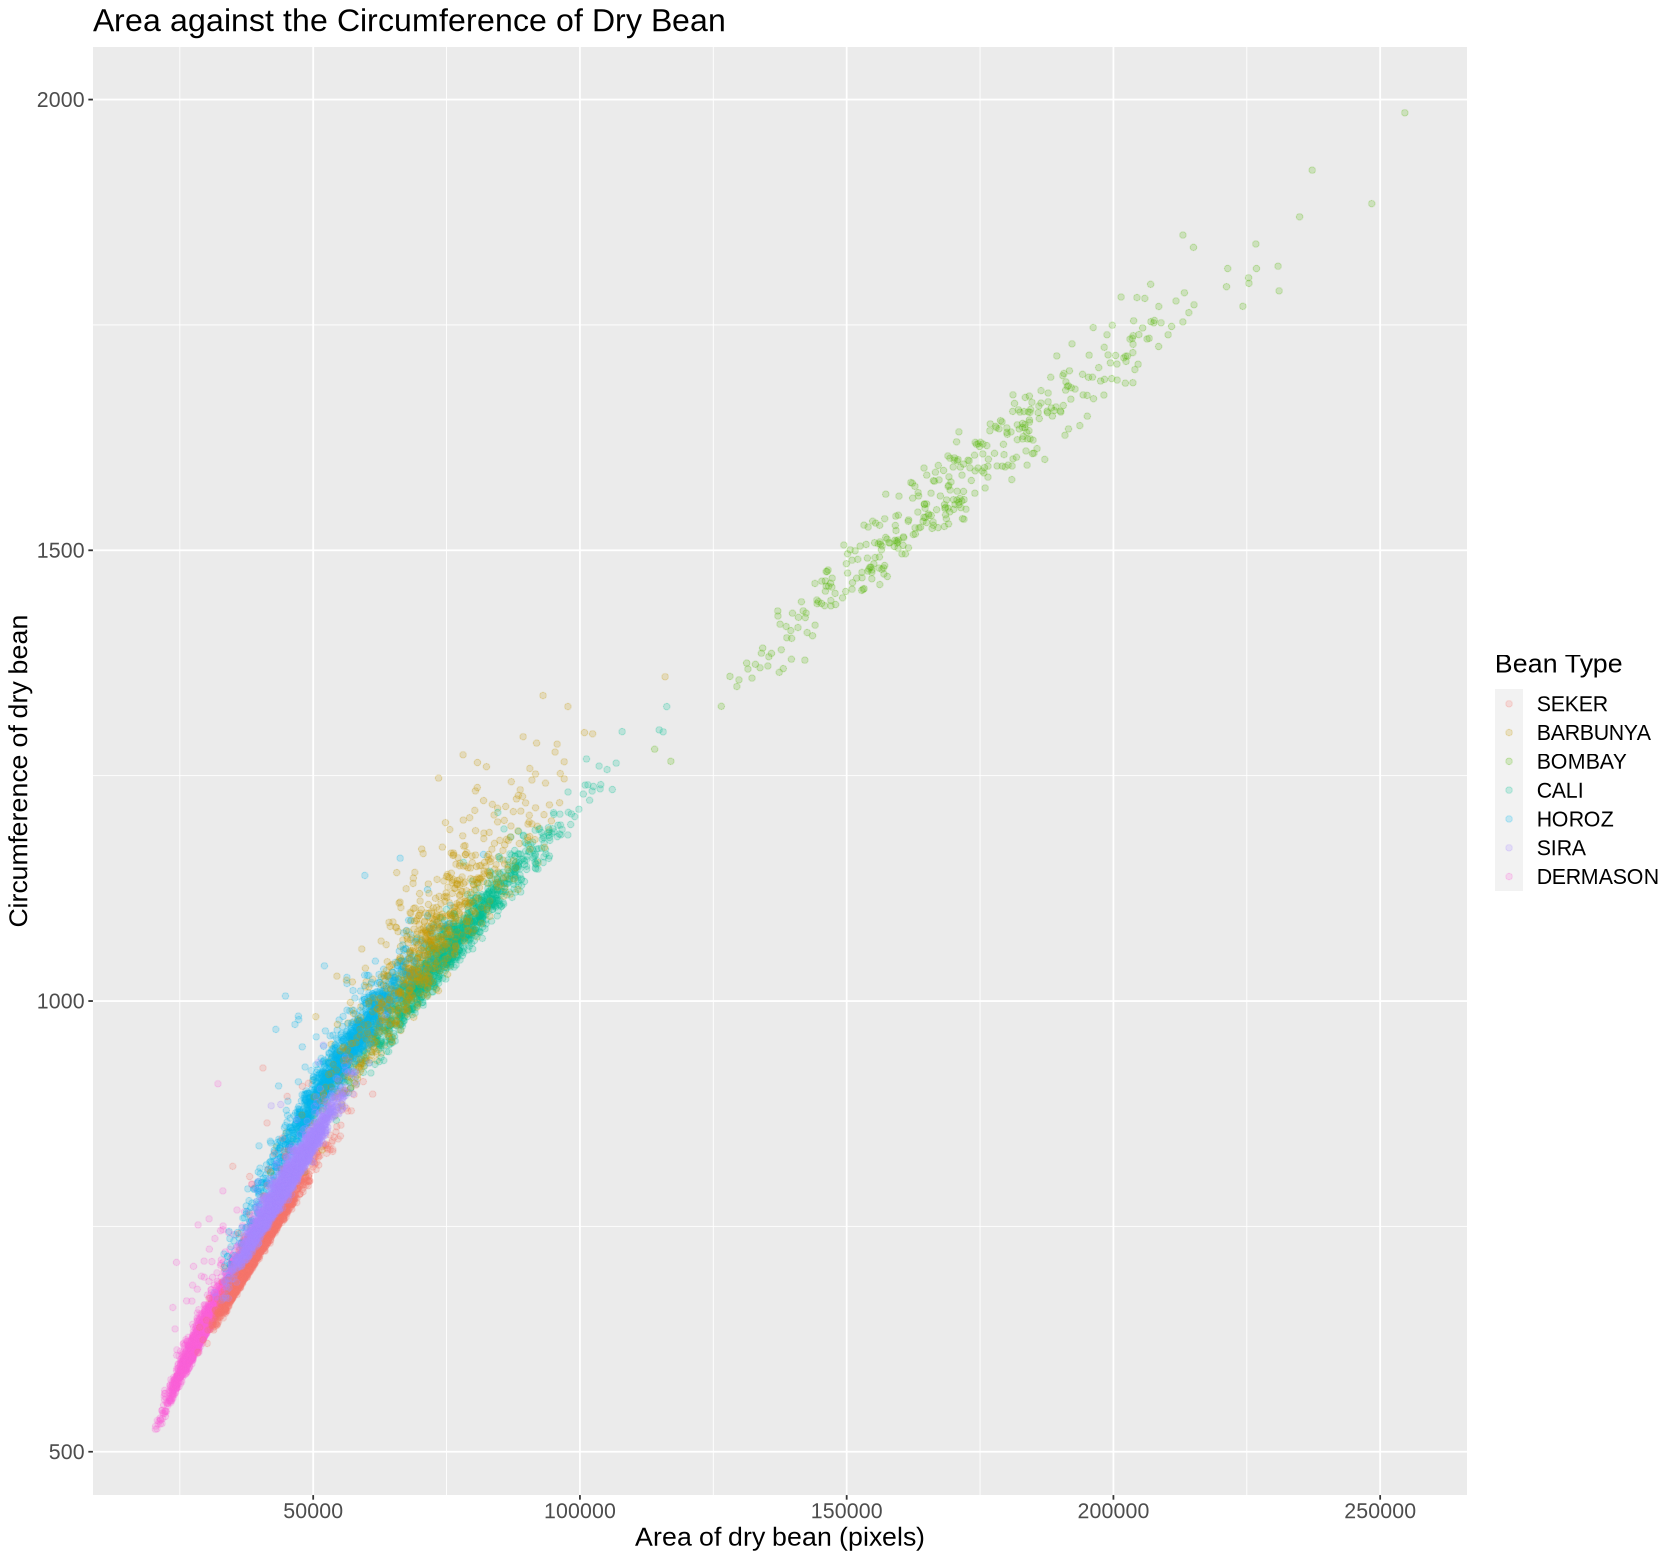

In [38]:
# Plot a graph of perimeter against area and color according to class.

options(repr.plot.width = 14, repr.plot.height = 13)

dry_bean_plot_1 <- dry_bean_train |>
                   ggplot(aes(x = area, y = perimeter, color = class)) +
                   geom_point(alpha = 0.2) +
                   xlab("Area of dry bean (pixels)") +
                   ylab("Circumference of dry bean") +
                   labs(color = "Bean Type") +
                   ggtitle("Area against the Circumference of Dry Bean") +
                   theme(text = element_text(size = 16))

dry_bean_plot_1

## Methods

*add text*

## Expected Outcomes and Significance

*add text*

## Citations

(1) S. Mamidi, M. Rossi, D. Annam et al., “Investigation of the domestication of common bean (Phaseolus vulgaris) using multilocus sequence data,” Functional Plant Biology, vol. 38, no. 12, pp. 953–967, 2011.
    https://www.publish.csiro.au/fp/FP11124

(2) https://www.sciencedirect.com/science/article/abs/pii/B9780128229767000120

IMPORTANT: ALL CITATIONS SHOULD BE IN THE SAME STYLE (ie: APA, CHICAGO...)
